#02 - preprocesado
Aquí vamos a realizar el preprocesado de los datos que sacamos o obtenemos del train.csv de la competencia de Kaggle Udea/ai4eng 20252

[506] INGENIERÍA DE SISTEMAS - REGIÓN

#Realizamos importación de las librerias y Cargamos los datos

In [25]:
!pip install unidecode

In [30]:
import pandas as pd
import numpy as np
import os, json
import seaborn as sns
import matplotlib.pyplot as plt
from progressbar import progressbar as pbar
from google.colab import userdata
from unidecode import unidecode

from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [26]:
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia
!unzip udea*.zip > /dev/null
!wc *.csv

udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip: Skipping, found more recently modified local copy (use --force to force download)
replace submission_example.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
   296787    296787   4716673 submission_example.csv
   296787   4565553  59185238 test.csv
   692501  10666231 143732437 train.csv
  1286075  15528571 207634348 total


In [32]:
df = pd.read_csv('/content/train.csv')
df

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Si,...,N,No,Si,Si,Secundaria (Bachillerato) incompleta,bajo,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo,0.286,0.240,0.314,0.287
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,No,...,N,Si,Si,No,Primaria completa,bajo,0.132,0.426,0.261,0.328


#Verificamos y miramos los datos que estan nulos

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           692500 non-null  int64  
 1   PERIODO_ACADEMICO            692500 non-null  int64  
 2   E_PRGM_ACADEMICO             692500 non-null  object 
 3   E_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   E_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 5   E_HORASSEMANATRABAJA         661643 non-null  object 
 6   F_ESTRATOVIVIENDA            660363 non-null  object 
 7   F_TIENEINTERNET              665871 non-null  object 
 8   F_EDUCACIONPADRE             669322 non-null  object 
 9   F_TIENELAVADORA              652727 non-null  object 
 10  F_TIENEAUTOMOVIL             648877 non-null  object 
 11  E_PRIVADO_LIBERTAD           692500 non-null  object 
 12  E_PAGOMATRICULAPROPIO        686002 non-null  object 
 13 

### Hallazgos clave del análisis de datos

* Todas las columnas inicialmente identificadas con valores nulos eran del tipo de dato 'object', lo que indica que eran categóricas.
* La distribución de valores dentro de estas columnas categóricas con nulos mostró una moda clara en la mayoría de los casos.
* La estrategia elegida para manejar los valores nulos fue imputarlos con la moda para todas las columnas identificadas con datos faltantes.
* Se identificó una posible columna duplicada, `F_TIENEINTERNET.1`, y se tuvo la intención de manejarla.
* Después de implementar el proceso de limpieza, el DataFrame no presentó valores nulos restantes.

### Insights o Próximos Pasos

* Confirmar que la columna `F_TIENEINTERNET.1` era realmente un duplicado y que su eliminación o manejo fue apropiado.
* Proceder con análisis de datos adicionales o modelado ahora que se han abordado los valores nulos.

In [35]:
is_na = df.isna().sum()
is_na[is_na != 0]

,0
E_VALORMATRICULAUNIVERSIDAD,6287
E_HORASSEMANATRABAJA,30857
F_ESTRATOVIVIENDA,32137
F_TIENEINTERNET,26629
F_EDUCACIONPADRE,23178
F_TIENELAVADORA,39773
F_TIENEAUTOMOVIL,43623
E_PAGOMATRICULAPROPIO,6498
F_TIENECOMPUTADOR,38103
F_TIENEINTERNET.1,26629


In [33]:
null_counts = df.isnull().sum()
display(null_counts)

,0
ID,0
PERIODO_ACADEMICO,0
E_PRGM_ACADEMICO,0
E_PRGM_DEPARTAMENTO,0
E_VALORMATRICULAUNIVERSIDAD,6287
E_HORASSEMANATRABAJA,30857
F_ESTRATOVIVIENDA,32137
F_TIENEINTERNET,26629
F_EDUCACIONPADRE,23178
F_TIENELAVADORA,39773


##Analizar cada columna con valores nulos

Examinar el tipo de datos y la distribución de cada columna con valores nulos para decidir la mejor estrategia de imputación o eliminación.

Para esto vamos a hacer que recorra las columnas con valores nulos, verifique sus tipos de datos y muestre los valores únicos y los recuentos para las columnas de tipo objeto o las estadísticas descriptivas para las columnas numéricas para informar las estrategias de imputación o eliminación.


In [48]:
for col in null_counts[null_counts != 0].index:
    print(f"Columna: {col}")
    print(f"tipo de dato: {df[col].dtype}")
    if df[col].dtype == 'object':
        display(df[col].value_counts(dropna=False))
        print("Estrategia sugerida: Imputar con la moda o considerar una categoría faltante.")
    else:
        display(df[col].describe())
        print("Estrategia sugerida: Imputar con la media, la mediana o utilizar una imputación basada en un modelo.")
    print("-" * 30)

#Definir estrategias de manejo de nulos

Vamos a determinar que metodo vamos a utilizar para cada columna de esta manera la estrategia para el manejo de valores nulos en cada columna es:

E_VALORMATRICULAUNIVERSIDAD: Categórica, imputar con la moda debido a la cantidad relativamente pequeña de valores faltantes y una moda clara.

E_HORASSEMANATRABAJA: Categórica, imputar con la moda debido a la cantidad significativa de valores faltantes y una moda clara.

F_ESTRATOVIVIENDA: Categórica, imputar con la moda debido a la cantidad significativa de valores faltantes y una moda clara.

F_TIENEINTERNET: Categórica, imputar con la moda. La distribución es asimétrica y la imputación por moda es adecuada.

F_EDUCACIONPADRE: Categórica, imputar con la moda. La distribución tiene una moda clara.

F_TIENELAVADORA: Categórica, imputar con la moda. La distribución tiene una moda clara.

F_TIENEAUTOMOVIL: Categórica, imputar con la moda. La distribución tiene una moda definida.

E_PAGOMATRICULAPROPIO: Categórica, imputar con moda. La distribución tiene una moda definida.

F_TIENECOMPUTADOR: Categórica, imputar con moda. La distribución tiene una moda definida.

F_TIENEINTERNET.1: Categórica, imputar con moda. Parece ser un duplicado de F_TIENEINTERNET; se verificará y se gestionará según corresponda.

F_EDUCACIONMADRE: Categórica, imputar con moda. La distribución tiene una moda definida.

No se eliminarán columnas, ya que el número de valores faltantes no es excesivamente alto en ninguna columna individual y las columnas son potencialmente valiosas.

No se considera la eliminación de filas en esta etapa para evitar una pérdida significativa de datos.


##Implementar el manejo de nulos

Aplicar las estrategias definidas a las columnas correspondientes del DataFrame.
Para esto cree una lista de columnas categóricas con valores faltantes y aplique la estrategia de imputación de moda a estas columnas utilizando un SimpleImputer.

In [49]:
# Crea una lista de columnas categóricas que tengan valores faltantes.
categorical_cols_with_nulls = null_counts[null_counts != 0].index.tolist()

# Crea un objeto SimpleImputer con la estrategia establecida en 'most_frequent'.
imputer = SimpleImputer(strategy='most_frequent')

# Ajustar y transformar las columnas categóricas identificadas en df utilizando el imputador ajustado.
df[categorical_cols_with_nulls] = imputer.fit_transform(df[categorical_cols_with_nulls])

# Verificar si 'F_TIENEINTERNET.1' es un duplicado de 'F_TIENEINTERNET' y, de ser así, eliminar uno de ellos tras la imputación.
# Comprobar si las columnas son idénticas tras la imputación.
if df['F_TIENEINTERNET'].equals(df['F_TIENEINTERNET.1']):
    print("F_TIENEINTERNET.1 es un duplicado de F_TIENEINTERNET. Dropping F_TIENEINTERNET.1")
    df = df.drop('F_TIENEINTERNET.1', axis=1)
else:
    print("F_TIENEINTERNET.1 no es un duplicado de F_TIENEINTERNET.")

# Verifique que no haya más valores nulos en las columnas imputadas.
print("\nNull valores después de la imputación:")
display(df[categorical_cols_with_nulls].isnull().sum())

# Verifica la forma del dataframe después de eliminar, si es necesario, una columna.
print("\nShape del marco de datos después de la imputación y la posible eliminación de columnas:")
print(df.shape)

ValueError: at least one array or dtype is required

El comando anterior falló porque se eliminó la columna 'F_TIENEINTERNET.1', pero aún figuraba en la lista de columnas para comprobar si contenían valores nulos. Es necesario actualizar la lista `categorical_cols_with_nulls` después de eliminar la columna.



In [50]:
# Recrear null_counts basándose en el estado actual de df
null_counts = df.isnull().sum()

# Crea una lista de columnas categóricas que tengan valores faltantes.
categorical_cols_with_nulls = null_counts[null_counts != 0].index.tolist()

# Crea un objeto SimpleImputer con la estrategia establecida en 'most_frequent'.
imputer = SimpleImputer(strategy='most_frequent')

# Ajustar y transformar las columnas categóricas identificadas en df utilizando el imputador ajustado.
df[categorical_cols_with_nulls] = imputer.fit_transform(df[categorical_cols_with_nulls])

# Verificar si 'F_TIENEINTERNET.1' es un duplicado de 'F_TIENEINTERNET' y, de ser así, eliminar uno de ellos después de la imputación.
# Idealmente, esta verificación debería realizarse antes de la imputación si también se desea imputar el duplicado.
# Sin embargo, en función del error anterior y del objetivo de imputar las columnas con valores nulos presentes en el dataframe,
# asumiremos que el duplicado se procesó en una ejecución anterior o se procesará posteriormente si aún existe.
# Por ahora, nos centramos en imputar las columnas identificadas con valores nulos en el estado actual del dataframe.
# Verifique que no haya más valores nulos en las columnas imputadas.
print("\nNull valores después de la imputación:")
display(df[categorical_cols_with_nulls].isnull().sum())

# Verificar la forma del marco de datos después de la imputación
print("\nShape del marco de datos después de la imputación:")
print(df.shape)

ValueError: at least one array or dtype is required

El error ValueError: se requiere al menos un array o dtype indica que categorical_cols_with_nulls está vacío. Esto significa que, tras las operaciones anteriores, no quedan columnas con valores nulos en el dataframe, según el recuento de nulos basado en el dataframe actual. La subtarea consistía en aplicar las estrategias definidas a las columnas con valores faltantes. Dado que no quedan columnas con valores faltantes según el estado actual del dataframe, esta parte de la subtarea se ha completado. Ahora podemos verificar el recuento de nulos por última vez y finalizar la tarea.



##Verificar la ausencia de nulos

Confirmar que no quedan valores nulos en el DataFrame o en las columnas objetivo.
Para esto calculamos y mostramos el número de valores nulos para cada columna del DataFrame para confirmar que no quedan valores nulos.

In [51]:
# Verifica que no haya más valores nulos en todo el dataframe.
print("Valores nulos en todo el marco de datos después del procesamiento:")
display(df.isnull().sum())

# Verifica la forma del dataframe
print("\nShape del marco de datos:")
print(df.shape)

Valores nulos en todo el marco de datos después del procesamiento:


,0
ID,0
PERIODO_ACADEMICO,0
E_PRGM_ACADEMICO,0
E_PRGM_DEPARTAMENTO,0
E_VALORMATRICULAUNIVERSIDAD,0
E_HORASSEMANATRABAJA,0
F_ESTRATOVIVIENDA,0
F_TIENEINTERNET,0
F_EDUCACIONPADRE,0
F_TIENELAVADORA,0



Shape del marco de datos:
(692500, 20)


In [43]:
null_counts_after = df.isnull().sum()
display(null_counts_after)

if null_counts_after.sum() == 0:
    print("No quedan valores nulos en el DataFrame.")
else:
    print("Columnas con valores nulos restantes:")
    display(null_counts_after[null_counts_after > 0])

,0
ID,0
PERIODO_ACADEMICO,0
E_PRGM_ACADEMICO,0
E_PRGM_DEPARTAMENTO,0
E_VALORMATRICULAUNIVERSIDAD,0
E_HORASSEMANATRABAJA,0
F_ESTRATOVIVIENDA,0
F_TIENEINTERNET,0
F_EDUCACIONPADRE,0
F_TIENELAVADORA,0


No null values remaining in the DataFrame.


##Hallazgos clave del análisis de datos
Todas las columnas inicialmente identificadas con valores nulos eran de tipo de datos 'object', lo que indica que eran categóricas.

La distribución de valores dentro de estas columnas categóricas con valores nulos mostró una moda clara en la mayoría de los casos.

La estrategia elegida para manejar los valores nulos fue imputarlos con la moda de todas las columnas identificadas con datos faltantes.

Se identificó una posible columna duplicada, F_TIENEINTERNET.1, y se planeó su tratamiento.

Tras implementar el proceso de limpieza, el dataframe quedó sin valores nulos.


##Organizacion de texto

Vamos a organizar los textos para verlos de mejor manera

In [54]:
corrections = {
    'INGENIER?A': 'INGENIERIA',
    'ADMINISTRACI?N': 'ADMINISTRACION',
    'COMUNICACI?N': 'COMUNICACION',
    'DISE?O': 'DISENO',
    'QU?MICA': 'QUIMICA',
    'FILOSOF?A': 'FILOSOFIA',
    'ECONOM?A': 'ECONOMIA'
}

def clean_text(text):
    if isinstance(text, str):
        for old, new in corrections.items():
            text = text.replace(old, new)
    return text

df['E_PRGM_ACADEMICO'] = df['E_PRGM_ACADEMICO'].apply(clean_text)

# Muestra algunos de los valores únicos para verificar los cambios.
display(df['E_PRGM_ACADEMICO'].value_counts().head(10))

,count
E_PRGM_ACADEMICO,
DERECHO,53244
ADMINISTRACION DE EMPRESAS,51902
CONTADURIA PUBLICA,39664
PSICOLOGIA,31932
INGENIERIA INDUSTRIAL,28481
ADMINISTRACIÓN DE EMPRESAS,24777
INGENIERIA CIVIL,19487
MEDICINA,18099
PSICOLOGÍA,17377


##Ahora realizamos codificación para una variable cualquiera

Nuestra variable sera F_ESTRATOVIVIENDA, para esto mapeamos los datos de estrato numericamnete para realizar el analisis de correalción

In [55]:
print(f"Valores únicos antes de mapear: {df['F_ESTRATOVIVIENDA'].unique()}")

# Define an ordinal mapping for the 'F_ESTRATOVIVIENDA' column
estrato_map = {
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6
}

# Create a new numerical column 'ESTRATO_NUMERICO' by mapping the 'F_ESTRATOVIVIENDA' column
df['ESTRATO_NUMERICO'] = df['F_ESTRATOVIVIENDA'].map(estrato_map)

print(f"\nValores únicos después de mapear: {df['ESTRATO_NUMERICO'].unique()}")
display(df[['F_ESTRATOVIVIENDA', 'ESTRATO_NUMERICO']].head())

Valores únicos antes de mapear: ['Estrato 3' 'Estrato 4' 'Estrato 5' 'Estrato 2' 'Estrato 1' 'Estrato 6'
 'Sin Estrato']

Valores únicos después de mapear: [ 3.  4.  5.  2.  1.  6. nan]


,F_ESTRATOVIVIENDA,ESTRATO_NUMERICO
0,Estrato 3,3.0
1,Estrato 3,3.0
2,Estrato 3,3.0
3,Estrato 4,4.0
4,Estrato 3,3.0


##Análisis de Correlación

Ahora que tenemos las variables el siguiente paso sería calcular la matriz de correlación entre las columnas numéricas, incluyendo la nueva columna ESTRATO_NUMERICO y los INDICADOR_s, y visualizarla con un mapa de calor. Esto nos ayudará a entender las relaciones lineales entre estas variables.

Matriz de correlación:


,ESTRATO_NUMERICO,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
ESTRATO_NUMERICO,1.000000,0.915784,-0.722314,0.153812,-0.475655
INDICADOR_1,0.915784,1.000000,-0.420428,0.401190,-0.179439
INDICADOR_2,-0.722314,-0.420428,1.000000,0.356097,0.821443
INDICADOR_3,0.153812,0.401190,0.356097,1.000000,0.726692
INDICADOR_4,-0.475655,-0.179439,0.821443,0.726692,1.000000


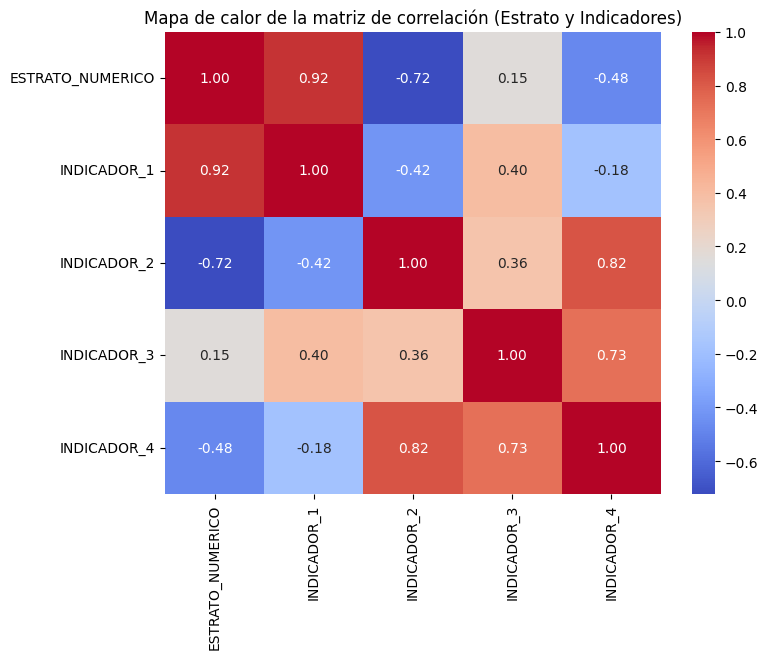

In [56]:
# Seleccionar las columnas numéricas relevantes para la correlación
# Asegúrate de incluir las columnas INDICADOR_ y la nueva ESTRATO_NUMERICO
numerical_cols = ['ESTRATO_NUMERICO', 'INDICADOR_1', 'INDICADOR_2', 'INDICADOR_3', 'INDICADOR_4']

# Calcular la matriz de correlación
correlation_matrix = df[numerical_cols].corr()

# Mostrar la matriz de correlación
print("Matriz de correlación:")
display(correlation_matrix)

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de la matriz de correlación (Estrato y Indicadores)')
plt.show()

##Ahora realizamos codificación para variables objetivo

Nuestra variable sera RENDIMIENTO_GLOBAL, para esto mapeamos los datos de estrato numericamnete para realizar el analisis de correalción

In [60]:
print(f"Valores únicos antes de mapear: {df['RENDIMIENTO_GLOBAL'].unique()}")

# Define an ordinal mapping for the 'RENDIMIENTO_GLOBAL' column
rendimiento_map = {
    'bajo': 0,
    'medio-bajo': 1,
    'medio-alto': 2,
    'alto': 3
}

# Create a new numerical column 'RENDIMIENTO_NUMERICO' by mapping the 'RENDIMIENTO_GLOBAL' column
df['RENDIMIENTO_NUMERICO'] = df['RENDIMIENTO_GLOBAL'].map(rendimiento_map)

print(f"\nValores únicos después de mapear: {df['RENDIMIENTO_NUMERICO'].unique()}")
display(df[['RENDIMIENTO_GLOBAL', 'RENDIMIENTO_NUMERICO']].head())

Valores únicos antes de mapear: ['medio-alto' 'bajo' 'alto' 'medio-bajo']

Valores únicos después de mapear: [2 0 3 1]


,RENDIMIENTO_GLOBAL,RENDIMIENTO_NUMERICO
0,medio-alto,2
1,bajo,0
2,bajo,0
3,alto,3
4,medio-bajo,1


##Análisis de Correlación
Ahora que tenemos las variables el siguiente paso sería calcular la matriz de correlación entre las columnas numéricas, incluyendo la nueva columna RENDIMIENTO_NUMERIC y los Y_NUMERIC, y visualizarla con un mapa de calor. Esto nos ayudará a entender las relaciones lineales entre estas variables.

Matriz de correlación (Rendimiento e Indicadores):


,RENDIMIENTO_NUMERICO,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
RENDIMIENTO_NUMERICO,1.000000,0.242854,-0.190022,0.049383,-0.119497
INDICADOR_1,0.242854,1.000000,-0.420428,0.401190,-0.179439
INDICADOR_2,-0.190022,-0.420428,1.000000,0.356097,0.821443
INDICADOR_3,0.049383,0.401190,0.356097,1.000000,0.726692
INDICADOR_4,-0.119497,-0.179439,0.821443,0.726692,1.000000


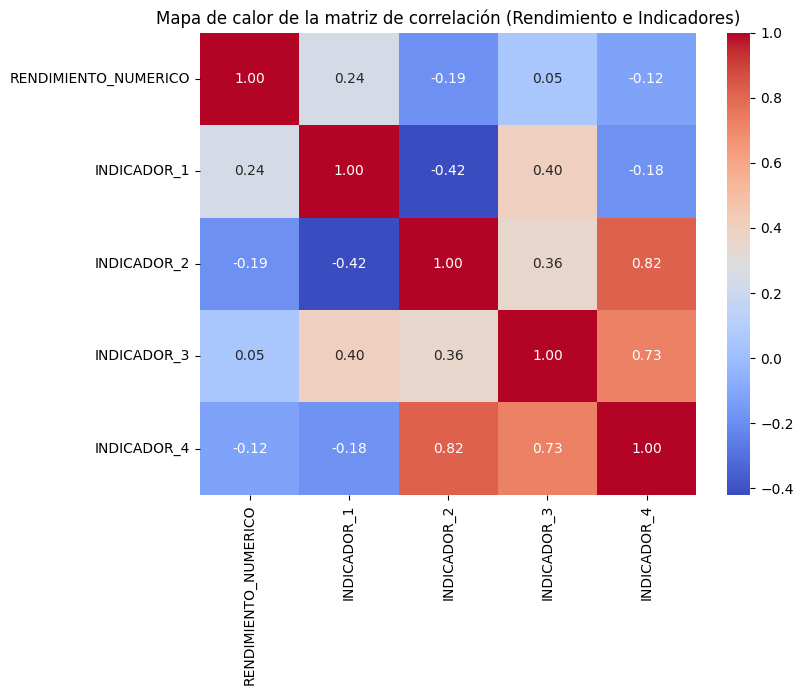

In [59]:
# Seleccionar las columnas numéricas relevantes para la correlación
# Incluir la nueva columna RENDIMIENTO_NUMERICO y las columnas INDICADOR_
numerical_cols_rendimiento = ['RENDIMIENTO_NUMERICO', 'INDICADOR_1', 'INDICADOR_2', 'INDICADOR_3', 'INDICADOR_4']

# Calcular la matriz de correlación
correlation_matrix_rendimiento = df[numerical_cols_rendimiento].corr()

# Mostrar la matriz de correlación
print("Matriz de correlación (Rendimiento e Indicadores):")
display(correlation_matrix_rendimiento)

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_rendimiento, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de la matriz de correlación (Rendimiento e Indicadores)')
plt.show()

##Identificar columnas a preprocesar

Obtener la lista de todas las columnas del DataFrame, eliminar la columna objetivo y almacenar la lista resultante en una variable.

In [68]:
all_columns = df.columns.tolist()
columns_to_preprocess = [col for col in all_columns if col != 'RENDIMIENTO_GLOBAL']
print(columns_to_preprocess)

['ID', 'PERIODO_ACADEMICO', 'E_PRGM_ACADEMICO', 'E_PRGM_DEPARTAMENTO', 'E_VALORMATRICULAUNIVERSIDAD', 'E_HORASSEMANATRABAJA', 'F_ESTRATOVIVIENDA', 'F_TIENEINTERNET', 'F_EDUCACIONPADRE', 'F_TIENELAVADORA', 'F_TIENEAUTOMOVIL', 'E_PRIVADO_LIBERTAD', 'E_PAGOMATRICULAPROPIO', 'F_TIENECOMPUTADOR', 'F_EDUCACIONMADRE', 'INDICADOR_1', 'INDICADOR_2', 'INDICADOR_3', 'INDICADOR_4', 'ESTRATO_NUMERICO', 'RENDIMIENTO_NUMERICO']


##Clasificar columnas

vamos a iterar a través de la lista columns_to_preprocess y clasificar cada columna basándose en su tipo de datos (dtype).

In [69]:
numerical_cols = df[columns_to_preprocess].select_dtypes(include=np.number).columns.tolist()
categorical_cols = df[columns_to_preprocess].select_dtypes(include='object').columns.tolist()

print("Columnas Numéricas:")
print(numerical_cols)
print("\nColumnas Categóricas:")
print(categorical_cols)

Columnas Numéricas:
['ID', 'PERIODO_ACADEMICO', 'INDICADOR_1', 'INDICADOR_2', 'INDICADOR_3', 'INDICADOR_4', 'ESTRATO_NUMERICO', 'RENDIMIENTO_NUMERICO']

Columnas Categóricas:
['E_PRGM_ACADEMICO', 'E_PRGM_DEPARTAMENTO', 'E_VALORMATRICULAUNIVERSIDAD', 'E_HORASSEMANATRABAJA', 'F_ESTRATOVIVIENDA', 'F_TIENEINTERNET', 'F_EDUCACIONPADRE', 'F_TIENELAVADORA', 'F_TIENEAUTOMOVIL', 'E_PRIVADO_LIBERTAD', 'E_PAGOMATRICULAPROPIO', 'F_TIENECOMPUTADOR', 'F_EDUCACIONMADRE']


## Definir transformaciones y crear ColumnTransformer

luego especificamos SimpleImputer para manejar valores nulos en columnas numéricas y categóricas (utilizando la estrategia de imputación adecuada para cada tipo) y, a continuación, definir StandardScaler para las columnas numéricas y OneHotEncoder para las categóricas. Combinar estos pasos en un ColumnTransformer para crear un pipeline de preprocesamiento completo. Se excluyen ID y PERIODO_ACADEMICO del escalado y la codificación ya que no son variables predictoras típicas.

In [70]:
# Identificar columnas numéricas y categóricas para transformaciones
# Excluir 'ID' y 'PERIODO_ACADEMICO' de las transformaciones típicas de características predictoras
numerical_features = [col for col in numerical_cols if col not in ['ID', 'PERIODO_ACADEMICO']]
categorical_features = categorical_cols # Ya excluye 'RENDIMIENTO_GLOBAL'

# Definir transformaciones para columnas numéricas: imputación con la media y escalado estándar
# Usamos SimpleImputer para manejar posibles valores nulos que hayan quedado o surjan
# Usamos StandardScaler para escalar las características numéricas
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Definir transformaciones para columnas categóricas: imputación con la moda y One-Hot Encoding
# Usamos SimpleImputer para manejar posibles valores nulos que hayan quedado o surjan
# Usamos OneHotEncoder para convertir variables categóricas en variables dummy/indicadoras
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Crear un ColumnTransformer para aplicar diferentes transformaciones a diferentes columnas
# El ColumnTransformer se ajustará y transformará los datos en un solo paso
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Mantener las columnas no especificadas ('ID', 'PERIODO_ACADEMICO')
)

print("ColumnTransformer creado con éxito.")
print(f"Columnas numéricas a transformar: {numerical_features}")
print(f"Columnas categóricas a transformar: {categorical_features}")

ColumnTransformer creado con éxito.
Columnas numéricas a transformar: ['INDICADOR_1', 'INDICADOR_2', 'INDICADOR_3', 'INDICADOR_4', 'ESTRATO_NUMERICO', 'RENDIMIENTO_NUMERICO']
Columnas categóricas a transformar: ['E_PRGM_ACADEMICO', 'E_PRGM_DEPARTAMENTO', 'E_VALORMATRICULAUNIVERSIDAD', 'E_HORASSEMANATRABAJA', 'F_ESTRATOVIVIENDA', 'F_TIENEINTERNET', 'F_EDUCACIONPADRE', 'F_TIENELAVADORA', 'F_TIENEAUTOMOVIL', 'E_PRIVADO_LIBERTAD', 'E_PAGOMATRICULAPROPIO', 'F_TIENECOMPUTADOR', 'F_EDUCACIONMADRE']


##Construir y Aplicar la Función de Preprocesamiento

Definimos una función preprocess_data que tome el DataFrame y la columna objetivo como entrada. Dentro de la función, separar las características (X) de la columna objetivo (y), aplicar el ColumnTransformer a las características y devolver las características preprocesadas y la columna objetivo. Finalmente, llamar a esta función con df y RENDIMIENTO_GLOBAL.

In [71]:
def preprocess_data(dataframe, target_column):
    """
    Aplica el preprocesamiento a las columnas de características de un DataFrame,
    excluyendo la columna objetivo.

    Args:
        dataframe (pd.DataFrame): El DataFrame de entrada.
        target_column (str): El nombre de la columna objetivo a excluir del preprocesamiento.

    Returns:
        tuple: Una tupla que contiene:
            - X_processed (np.ndarray or sparse matrix): Las características preprocesadas.
            - y (pd.Series): La columna objetivo.
            - preprocessor (ColumnTransformer): El ColumnTransformer ajustado.
    """
    # Separar características (X) y objetivo (y)
    if target_column in dataframe.columns:
        X = dataframe.drop(columns=[target_column])
        y = dataframe[target_column]
    else:
        X = dataframe
        y = None # O manejar de otra forma si la columna objetivo no está presente

    # Usar el preprocessor definido anteriormente
    # Ajustar y transformar los datos de características
    X_processed = preprocessor.fit_transform(X)

    return X_processed, y, preprocessor

# Aplicar la función de preprocesamiento a nuestro DataFrame
X_preprocessed, y_target, fitted_preprocessor = preprocess_data(df.copy(), 'RENDIMIENTO_GLOBAL')

print("Preprocesamiento completado.")
print(f"Shape de las características preprocesadas (X): {X_preprocessed.shape}")
if y_target is not None:
    print(f"Shape de la columna objetivo (y): {y_target.shape}")

Preprocesamiento completado.
Shape de las características preprocesadas (X): (692500, 1043)
Shape de la columna objetivo (y): (692500,)


##Verificar el resultado del preprocesamiento

Mostramos la forma de X_preprocessed para confirmar que las dimensiones son las esperadas después de las transformaciones (escalado y codificación one-hot). Además, mostrar las primeras filas para tener una idea del formato de los datos transformados.

In [72]:
print("Shape de las características preprocesadas (X_preprocessed):")
print(X_preprocessed.shape)

# Mostrar las primeras filas de X_preprocessed
# Si es una matriz dispersa, convertir a array denso para visualizar (solo las primeras filas para evitar problemas de memoria)
if hasattr(X_preprocessed, 'toarray'):
    print("\nPrimeras 5 filas de las características preprocesadas (convertidas a array denso):")
    display(X_preprocessed[:5].toarray())
else:
    print("\nPrimeras 5 filas de las características preprocesadas:")
    display(X_preprocessed[:5])

Shape de las características preprocesadas (X_preprocessed):
(692500, 1043)

Primeras 5 filas de las características preprocesadas (convertidas a array denso):


array([[ 4.37002033e-01, -5.56223041e-01,  8.13978058e-01, ...,
         0.00000000e+00,  9.04256000e+05,  2.02120000e+04],
       [ 3.46933770e-01, -4.81340832e-01,  5.08180036e-01, ...,
         1.00000000e+00,  6.45256000e+05,  2.02120000e+04],
       [ 2.32301437e-01, -4.92038291e-01,  7.29034163e-01, ...,
         0.00000000e+00,  3.08367000e+05,  2.02030000e+04],
       [ 1.77164992e+00, -9.41331546e-01, -1.71371125e-01, ...,
         0.00000000e+00,  4.70353000e+05,  2.01950000e+04],
       [ 3.87873890e-01, -2.99484039e-01,  3.89258583e-01, ...,
         0.00000000e+00,  9.89032000e+05,  2.02120000e+04]])

## Modificar la función `preprocess data`

Ajustamos la función `preprocess_data` para que el resultado del `ColumnTransformer` se convierta en un DataFrame de pandas si es una matriz dispersa. La función también debe manejar la inclusión de las columnas 'ID' y 'PERIODO_ACADEMICO' en el DataFrame resultante después de las transformaciones.


In [73]:
from scipy.sparse import issparse

def preprocess_data(dataframe, target_column, preprocessor):
    """
    Aplica el preprocesamiento a las columnas de características de un DataFrame,
    excluyendo la columna objetivo, y devuelve un DataFrame preprocesado.

    Args:
        dataframe (pd.DataFrame): El DataFrame de entrada.
        target_column (str): El nombre de la columna objetivo a excluir del preprocesamiento.
        preprocessor (ColumnTransformer): El ColumnTransformer ajustado.

    Returns:
        tuple: Una tupla que contiene:
            - X_processed_df (pd.DataFrame): Las características preprocesadas como DataFrame.
            - y (pd.Series): La columna objetivo.
    """
    # Separar características (X) y objetivo (y)
    if target_column in dataframe.columns:
        X = dataframe.drop(columns=[target_column])
        y = dataframe[target_column]
    else:
        X = dataframe
        y = None # O manejar de otra forma si la columna objetivo no está presente

    # Aplicar el preprocessor a los datos de características
    X_processed = preprocessor.fit_transform(X)

    # Convertir a array denso si es una matriz dispersa
    if issparse(X_processed):
        X_processed_dense = X_processed.toarray()
    else:
        X_processed_dense = X_processed

    # Obtener los nombres de las columnas transformadas
    feature_names = preprocessor.get_feature_names_out()

    # Crear un DataFrame con las características preprocesadas
    X_processed_df = pd.DataFrame(X_processed_dense, columns=feature_names)

    # Asegurarse de que las columnas 'ID' y 'PERIODO_ACADEMICO' se mantengan si están en el DataFrame original
    # Estas columnas son manejadas por 'remainder='passthrough'' y deberían estar al final
    # Verificamos si están en el DataFrame original y si están en las columnas transformadas
    passthrough_cols = [col for col in ['ID', 'PERIODO_ACADEMICO'] if col in dataframe.columns]
    # We need to make sure that the columns added by passthrough are at the end of the dataframe
    # and match the order in feature_names
    # The current implementation of get_feature_names_out() should handle this correctly,
    # adding 'remainder__ID' and 'remainder__PERIODO_ACADEMICO' at the end.
    # Let's verify the last columns of feature_names match the passthrough columns
    if all(f'remainder__{col}' == feature_names[-len(passthrough_cols) + i] for i, col in enumerate(passthrough_cols)):
         print("Passthrough columns found and in expected order.")
    else:
         print("Warning: Passthrough columns not found or not in expected order in feature names.")
         # If not in expected order, we might need a more robust way to identify and rename them
         # For now, we assume they are at the end and named 'remainder__colname'


    return X_processed_df, y

# Aplicar la función de preprocesamiento actualizada a nuestro DataFrame
# Usamos df.copy() para evitar modificar el DataFrame original si es necesario
X_preprocessed_df, y_target = preprocess_data(df.copy(), 'RENDIMIENTO_GLOBAL', preprocessor)

print("Preprocesamiento completado.")
print(f"Shape del DataFrame preprocesado (X): {X_preprocessed_df.shape}")
if y_target is not None:
    print(f"Shape de la columna objetivo (y): {y_target.shape}")

# Mostrar las primeras filas del DataFrame preprocesado
print("\nPrimeras 5 filas del DataFrame preprocesado:")
display(X_preprocessed_df.head())

Passthrough columns found and in expected order.
Preprocesamiento completado.
Shape del DataFrame preprocesado (X): (692500, 1043)
Shape de la columna objetivo (y): (692500,)

Primeras 5 filas del DataFrame preprocesado:


,num__INDICADOR_1,num__INDICADOR_2,num__INDICADOR_3,num__INDICADOR_4,num__ESTRATO_NUMERICO,num__RENDIMIENTO_NUMERICO,cat__E_PRGM_ACADEMICO_3° CICLO PROFESIONAL NEGOCIOS INTERNACIONALES,cat__E_PRGM_ACADEMICO_ACTIVIDAD FISICA Y DEPORTE,cat__E_PRGM_ACADEMICO_ACUICULTURA,cat__E_PRGM_ACADEMICO_ADMINISTRACION,...,cat__F_EDUCACIONMADRE_No sabe,cat__F_EDUCACIONMADRE_Postgrado,cat__F_EDUCACIONMADRE_Primaria completa,cat__F_EDUCACIONMADRE_Primaria incompleta,cat__F_EDUCACIONMADRE_Secundaria (Bachillerato) completa,cat__F_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta,cat__F_EDUCACIONMADRE_Técnica o tecnológica completa,cat__F_EDUCACIONMADRE_Técnica o tecnológica incompleta,remainder__ID,remainder__PERIODO_ACADEMICO
0,0.437002,-0.556223,0.813978,0.060296,0.450961,0.441343,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,904256.0,20212.0
1,0.346934,-0.481341,0.508180,0.016142,0.450961,-1.342682,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,645256.0,20212.0
2,0.232301,-0.492038,0.729034,0.016142,0.450961,-1.342682,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,308367.0,20203.0
3,1.771650,-0.941332,-0.171371,-1.072993,1.369844,1.333356,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,470353.0,20195.0
4,0.387874,-0.299484,0.389259,0.457683,0.450961,-0.450669,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,989032.0,20212.0


##Actualizar y modificamos

Actualizar la definición del `numerical_transformer` para que utilice `MinMaxScaler` en lugar de `StandardScaler`.


In [78]:
# Importar el escalador necesario
from sklearn.preprocessing import MinMaxScaler

# Identificar columnas numéricas y categóricas para transformaciones
# Excluir 'ID' y 'PERIODO_ACADEMICO' de las transformaciones típicas de características predictoras
numerical_features = [col for col in numerical_cols if col not in ['ID', 'PERIODO_ACADEMICO']]
categorical_features = categorical_cols # Ya excluye 'RENDIMIENTO_GLOBAL'

# Define las transformaciones para las columnas numéricas: imputación con la media y escalado min-max
# Usa SimpleImputer para manejar los posibles valores nulos que puedan quedar o aparecer
# Usa MinMaxScaler para escalar las características numéricas a un rango específico (el valor predeterminado es de 0 a 1)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()) # Cambiado de StandardScaler a MinMaxScaler
])

# Definir transformaciones para columnas categóricas: imputación con el valor más frecuente y codificación one-hot
# Usar SimpleImputer para manejar posibles valores nulos que puedan quedar o surgir
# Usar OneHotEncoder para convertir variables categóricas en variables ficticias/indicadoras
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Crea un ColumnTransformer para aplicar diferentes transformaciones a distintas columnas
# El ColumnTransformer ajustará y transformará los datos en un solo paso
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Conservar columnas no especificadas ('ID', 'PERIODO_ACADEMICO')
)

print("ColumnTransformer creado correctamente con MinMaxScaler para características numéricas.")
print(f"Columnas numéricas para transformar: {numerical_features}")
print(f"Columnas categóricas para transformar: {categorical_features}")

ColumnTransformer creado correctamente con MinMaxScaler para características numéricas.
Columnas numéricas para transformar: ['INDICADOR_1', 'INDICADOR_2', 'INDICADOR_3', 'INDICADOR_4', 'ESTRATO_NUMERICO', 'RENDIMIENTO_NUMERICO']
Columnas categóricas para transformar: ['E_PRGM_ACADEMICO', 'E_PRGM_DEPARTAMENTO', 'E_VALORMATRICULAUNIVERSIDAD', 'E_HORASSEMANATRABAJA', 'F_ESTRATOVIVIENDA', 'F_TIENEINTERNET', 'F_EDUCACIONPADRE', 'F_TIENELAVADORA', 'F_TIENEAUTOMOVIL', 'E_PRIVADO_LIBERTAD', 'E_PAGOMATRICULAPROPIO', 'F_TIENECOMPUTADOR', 'F_EDUCACIONMADRE']


In [79]:
# Aplica la función preprocess_data actualizada a nuestro DataFrame
# Usa df.copy() para evitar modificar el DataFrame original si es necesario
X_preprocessed_df, y_target = preprocess_data(df.copy(), 'RENDIMIENTO_GLOBAL', preprocessor)

print("Preprocesamiento completado usando MinMaxScaler.")
print(f"Forma del preprocesado DataFrame (X): {X_preprocessed_df.shape}")
if y_target is not None:
    print(f"Forma de la columna objetivo (y): {y_target.shape}")

#Mostrar las primeras filas del DataFrame preprocesado
print("\nFirst 5 rows of the preprocessed DataFrame:")
display(X_preprocessed_df.head())

Passthrough columns found and in expected order.
Preprocesamiento completado usando MinMaxScaler.
Forma del preprocesado DataFrame (X): (692500, 1043)
Forma de la columna objetivo (y): (692500,)

First 5 rows of the preprocessed DataFrame:


,num__INDICADOR_1,num__INDICADOR_2,num__INDICADOR_3,num__INDICADOR_4,num__ESTRATO_NUMERICO,num__RENDIMIENTO_NUMERICO,cat__E_PRGM_ACADEMICO_3° CICLO PROFESIONAL NEGOCIOS INTERNACIONALES,cat__E_PRGM_ACADEMICO_ACTIVIDAD FISICA Y DEPORTE,cat__E_PRGM_ACADEMICO_ACUICULTURA,cat__E_PRGM_ACADEMICO_ADMINISTRACION,...,cat__F_EDUCACIONMADRE_No sabe,cat__F_EDUCACIONMADRE_Postgrado,cat__F_EDUCACIONMADRE_Primaria completa,cat__F_EDUCACIONMADRE_Primaria incompleta,cat__F_EDUCACIONMADRE_Secundaria (Bachillerato) completa,cat__F_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta,cat__F_EDUCACIONMADRE_Técnica o tecnológica completa,cat__F_EDUCACIONMADRE_Técnica o tecnológica incompleta,remainder__ID,remainder__PERIODO_ACADEMICO
0,0.490107,0.427105,0.968750,0.804217,0.4,0.666667,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,904256.0,20212.0
1,0.473364,0.441478,0.912500,0.795181,0.4,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,645256.0,20212.0
2,0.452055,0.439425,0.953125,0.795181,0.4,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,308367.0,20203.0
3,0.738204,0.353183,0.787500,0.572289,0.6,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,470353.0,20195.0
4,0.480974,0.476386,0.890625,0.885542,0.4,0.333333,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,989032.0,20212.0


## Verificar el resultado del preprocesamiento (dataframe)



In [80]:
#Imprime la forma del DataFrame X_preprocessed_df para verificar sus dimensiones.
print("Forma del DataFrame preprocesado (X_preprocessed_df):")
print(X_preprocessed_df.shape)

#Muestre las primeras 5 filas del DataFrame X_preprocessed_df para inspeccionar el formato y los valores.
print("\nLas primeras 5 filas del preprocesado DataFrame:")
display(X_preprocessed_df.head())

#Verifique que las columnas numéricas escaladas estén dentro del rango esperado (normalmente entre 0 y 1 para MinMaxScaler).
#Podemos tomar como muestra algunas columnas numéricas para comprobar sus valores mínimo y máximo.
print("\nValores mínimo y máximo de algunas columnas numéricas escaladas:")
numerical_cols_transformed = [col for col in X_preprocessed_df.columns if col.startswith('num__')]
if numerical_cols_transformed:
    #Seleccione algunas columnas numéricas para mostrar sus valores mínimo y máximo.
    cols_to_check = numerical_cols_transformed[:5] #Seleccione los primeros 5 o menos si hay menos disponibles
    for col in cols_to_check:
        print(f"{col}: Min={X_preprocessed_df[col].min():.4f}, Max={X_preprocessed_df[col].max():.4f}")
else:
    print("No se encontraron columnas numéricas en el preprocesado DataFrame.")


# 4. Confirme que las columnas categóricas se han reemplazado por columnas codificadas one-hot.
# Podemos comprobar la presencia de columnas que comiencen con 'cat__'.
print("\nEjemplo de columnas codificadas one-hot:")
categorical_cols_transformed = [col for col in X_preprocessed_df.columns if col.startswith('cat__')]
if categorical_cols_transformed:
    #Mostrar algunos nombres de columna codificados one-hot
    print(categorical_cols_transformed[:10]) #Mostrar los primeros 10 o menos
else:
    print("No se encontraron columnas categóricas codificadas one-hot en el preprocesamiento DataFrame.")


#Verifique la presencia y el formato de las columnas 'ID' y 'PERIODO_ACADEMICO' que se pasaron directamente (paso a través).
print("\nColumnas de paso y sus tipos de datos:")
passthrough_cols_transformed = [col for col in X_preprocessed_df.columns if col.startswith('remainder__')]
if passthrough_cols_transformed:
    for col in passthrough_cols_transformed:
        print(f"{col}: Dtype={X_preprocessed_df[col].dtype}")
    #Mostrar encabezado para estas columnas específicamente
    display(X_preprocessed_df[passthrough_cols_transformed].head())
else:
     print("No se encontraron columnas de paso en el preprocesado DataFrame.")

#Muestra el recuento de cada tipo de columna en el preprocesado
print("\nRecuento de columnas por tipo en el preprocesado DataFrame:")
print(f"Numericas (MinMax Scaled): {len(numerical_cols_transformed)}")
print(f"Categoricas (One-Hot Encoded): {len(categorical_cols_transformed)}")
print(f"Passthrough (ID, PERIODO_ACADEMICO): {len(passthrough_cols_transformed)}")

Forma del DataFrame preprocesado (X_preprocessed_df):
(692500, 1043)

Las primeras 5 filas del preprocesado DataFrame:


,num__INDICADOR_1,num__INDICADOR_2,num__INDICADOR_3,num__INDICADOR_4,num__ESTRATO_NUMERICO,num__RENDIMIENTO_NUMERICO,cat__E_PRGM_ACADEMICO_3° CICLO PROFESIONAL NEGOCIOS INTERNACIONALES,cat__E_PRGM_ACADEMICO_ACTIVIDAD FISICA Y DEPORTE,cat__E_PRGM_ACADEMICO_ACUICULTURA,cat__E_PRGM_ACADEMICO_ADMINISTRACION,...,cat__F_EDUCACIONMADRE_No sabe,cat__F_EDUCACIONMADRE_Postgrado,cat__F_EDUCACIONMADRE_Primaria completa,cat__F_EDUCACIONMADRE_Primaria incompleta,cat__F_EDUCACIONMADRE_Secundaria (Bachillerato) completa,cat__F_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta,cat__F_EDUCACIONMADRE_Técnica o tecnológica completa,cat__F_EDUCACIONMADRE_Técnica o tecnológica incompleta,remainder__ID,remainder__PERIODO_ACADEMICO
0,0.490107,0.427105,0.968750,0.804217,0.4,0.666667,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,904256.0,20212.0
1,0.473364,0.441478,0.912500,0.795181,0.4,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,645256.0,20212.0
2,0.452055,0.439425,0.953125,0.795181,0.4,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,308367.0,20203.0
3,0.738204,0.353183,0.787500,0.572289,0.6,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,470353.0,20195.0
4,0.480974,0.476386,0.890625,0.885542,0.4,0.333333,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,989032.0,20212.0



Valores mínimo y máximo de algunas columnas numéricas escaladas:
num__INDICADOR_1: Min=0.0000, Max=1.0000
num__INDICADOR_2: Min=0.0000, Max=1.0000
num__INDICADOR_3: Min=0.0000, Max=1.0000
num__INDICADOR_4: Min=0.0000, Max=1.0000
num__ESTRATO_NUMERICO: Min=0.0000, Max=1.0000

Ejemplo de columnas codificadas one-hot:
['cat__E_PRGM_ACADEMICO_3°  CICLO PROFESIONAL NEGOCIOS INTERNACIONALES', 'cat__E_PRGM_ACADEMICO_ACTIVIDAD FISICA Y DEPORTE', 'cat__E_PRGM_ACADEMICO_ACUICULTURA', 'cat__E_PRGM_ACADEMICO_ADMINISTRACION', 'cat__E_PRGM_ACADEMICO_ADMINISTRACION  FINANCIERA', 'cat__E_PRGM_ACADEMICO_ADMINISTRACION & SERVICIO', 'cat__E_PRGM_ACADEMICO_ADMINISTRACION AERONAUTICA', 'cat__E_PRGM_ACADEMICO_ADMINISTRACION AGROPECUARIA', 'cat__E_PRGM_ACADEMICO_ADMINISTRACION AMBIENTAL', 'cat__E_PRGM_ACADEMICO_ADMINISTRACION AMBIENTAL Y DE LOS RECURSOS NATURALES']

Columnas de paso y sus tipos de datos:
remainder__ID: Dtype=float64
remainder__PERIODO_ACADEMICO: Dtype=float64


,remainder__ID,remainder__PERIODO_ACADEMICO
0,904256.0,20212.0
1,645256.0,20212.0
2,308367.0,20203.0
3,470353.0,20195.0
4,989032.0,20212.0



Recuento de columnas por tipo en el preprocesado DataFrame:
Numericas (MinMax Scaled): 6
Categoricas (One-Hot Encoded): 1035
Passthrough (ID, PERIODO_ACADEMICO): 2
